# History

The history of neural networks dates back to the 1940s when the first artificial neuron was introduced by Warren McCulloch and Walter Pitts. They proposed a mathematical model of a neuron that could take in binary inputs and produce binary outputs.

In the 1950s and 1960s, researchers such as Frank Rosenblatt developed the perceptron, which is a type of neural network that can learn to classify patterns. However, the limitations of the perceptron were soon discovered, and it fell out of favor in the research community.

In the 1980s, a breakthrough in neural network research occurred with the introduction of the backpropagation algorithm. This allowed for the efficient training of multi-layer neural networks, which had previously been impractical. This led to a resurgence of interest in neural networks and the development of new architectures, such as convolutional neural networks and recurrent neural networks.

In the 1990s and 2000s, neural networks were applied to a wide range of tasks, including image recognition, speech recognition, and natural language processing. However, their performance was often limited by the availability of data and computing power.

In recent years, the availability of large datasets and powerful GPUs has led to a revolution in neural network research. Deep learning, which involves training neural networks with many layers, has achieved remarkable success in a wide range of applications, including computer vision, natural language processing, and game playing. Today, neural networks are one of the most important tools in the field of artificial intelligence, and they continue to advance rapidly.

## The perceptron

![My Image](general-diagram-of-perceptron-for-supervised-learning_4.jpg)

The perceptron is a type of neural network that can learn to classify input patterns into different classes. It was first introduced by Frank Rosenblatt in 1958.

The perceptron consists of a single layer of artificial neurons, each of which takes in a set of inputs and produces an output based on a set of weights and a threshold value. The output is then fed to the next layer of neurons or used as the final output of the network.


$$z = w_1x_1 + w_2x_2 + w_3x_3 + ........ + w_nx_n$$

$$y_p = f(z - θ)$$

### Learning Mechanism

$$y_p = f(w_1x_1 + w_2x_2 + w_3x_3 + ........ + w_nx_n - \theta)$$

Loss Function:

$$MSE = E = \frac{1}{2m} \sum_{i=1}^m (y_p^{(i)} - y^{(i)}) ^ 2$$


Our goal is to minimize the error function $E$ with respect to the weights and threshold. To do this, we use gradient descent, which involves taking small steps in the direction of the negative gradient of $E$ with respect to the weights and threshold. The negative gradient gives the steepest descent direction, which is the direction of greatest decrease in $E$.

To calculate the gradient of $E$, we need to use the chain rule of differentiation. 

$$\frac{\partial E}{\partial w_i} = \frac{\partial E}{\partial y}\frac{\partial y}{\partial z}\frac{\partial z}{\partial w_i}$$

$$\frac{\partial E}{\partial \theta} = \frac{\partial E}{\partial y}\frac{\partial y}{\partial z}\frac{\partial z}{\partial \theta}$$


We start by computing the derivative of $E$ with respect to $y$:

$$\frac{\partial E}{\partial y} = \frac{1}{m} \sum_{i=1}^m (y^{(i)} - y_p^{(i)})$$

Next, we compute the derivative of $y$ with respect to the weighted sum $z$:

$$\frac{\partial y}{\partial z} =  f^\prime(z)$$

where $f'()$ is the derivative of the activation function $f()$. For the Heaviside step function, which is commonly used as the activation function in perceptrons, $f'(z)$ is either 0 or 1 depending on whether $z$ is greater than or equal to 0.

Finally, we compute the derivative of $z$ with respect to the weights and threshold:

$$\frac{\partial z}{\partial w_i} = x_i$$

$$\frac{\partial z}{\partial \theta} = -1$$

Putting it all together, we can compute the gradient of $E$ with respect to the weights and threshold:

$$\frac{\partial E}{\partial w_i} = \frac{\partial E}{\partial y}\frac{\partial y}{\partial z}\frac{\partial z}{\partial w_i} = \frac{1}{m} \sum_{i=1}^m (y^{(i)} - y_p^{(i)})f^\prime(z^{(i)}) x_i$$


$$\frac{\partial E}{\partial \theta} = \frac{\partial E}{\partial y}\frac{\partial y}{\partial z}\frac{\partial z}{\partial \theta} = - \frac{1}{m} \sum_{i=1}^m (y^{(i)} - y_p^{(i)})f^\prime(z^{(i)})$$

We can then use these gradients to update the weights and threshold:

$$w_i = w_i + \alpha(y_d^{(i)} - y^{(i)})x_i$$

$$\theta = \theta - \alpha \frac{\partial E}{\partial \theta}$$

where $\alpha$ is the learning rate, which controls the step size in the gradient descent algorithm.

### Limitation

The perceptron algorithm has a limitation in that it can only classify input patterns that are linearly separable, meaning that they can be separated into two or more classes by a straight line or hyperplane.

The XOR problem is a classic example of a problem that is not linearly separable. The XOR function takes two binary inputs (0 or 1) and produces a binary output based on the exclusive-or (XOR) operation. The truth table for the XOR function is:


Input 1 | Input 2 | Output
--------|---------|-------
   0    |    0    |   0
   0    |    1    |   1
   1    |    0    |   1
   1    |    1    |   0
   
   
It can be shown that the XOR problem cannot be solved by a single perceptron because there is no way to separate the input patterns into two classes using a straight line or hyperplane. Therefore, the perceptron algorithm is not suitable for solving the XOR problem.


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.weights = np.zeros(input_size + 1)
        self.lr = learning_rate
        self.epochs = epochs

    def activation_fn(self, x):
        # Heaviside step function
        return 1 if x >= 0 else 0

    def predict(self, x):
        z = np.dot(x, self.weights[1:]) + self.weights[0]
        y = self.activation_fn(z)
        return y

    def fit(self, X, y):
        for _ in range(self.epochs):
            for xi, yi in zip(X, y):
                y_pred = self.predict(xi)
                error = yi - y_pred
                self.weights[1:] += self.lr * error * xi
                self.weights[0] += self.lr * error
                
    def get_weights(self):
        return self.weights

                
def plot_decision_boundary(X, y, weights):
    x1 = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)
    x2 = -(weights[0] + weights[1]*x1) / weights[2]
    plt.plot(x1, x2, '-g', label='Decision boundary')
    plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()

We are going to model the OR function using the perceptron, remember the OR function is:

X1 | X2 | Y
--------|---------|-------
   0    |    0    |   0
   0    |    1    |   0
   1    |    0    |   0
   1    |    1    |   1


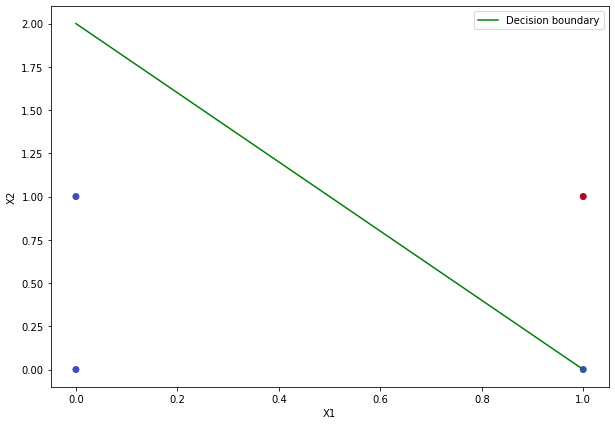

In [12]:
# Training data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# Create perceptron object and fit to data
perceptron = Perceptron(input_size=2)
perceptron.fit(X, y)

# Plot the decision boundary
weights = perceptron.get_weights()
plt.figure(figsize=(10, 7))
plot_decision_boundary(X, y, weights)

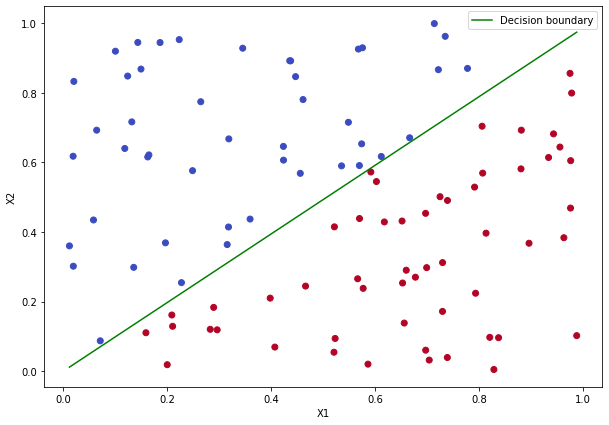

In [10]:
# Generate random data
np.random.seed(0)
X = np.random.rand(100, 2)
y = np.zeros(100)
y[np.where(X[:,0] > X[:,1])] = 1

# Train the perceptron
perceptron = Perceptron(input_size=2)
perceptron.fit(X, y)

# Plot the decision boundary
weights = perceptron.get_weights()

plt.figure(figsize=(10, 7))
plot_decision_boundary(X, y, weights)